In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
dataset = pd.read_csv('nn.csv')
X = dataset.iloc[:, [3,4]].values

In [87]:
X

array([[ 0.0584386,  1.       ],
       [ 0.0525551,  1.       ],
       [ 0.0427475,  1.       ],
       ...,
       [-0.0150102,  2.       ],
       [-0.0127803,  2.       ],
       [ 0.0564501,  2.       ]])

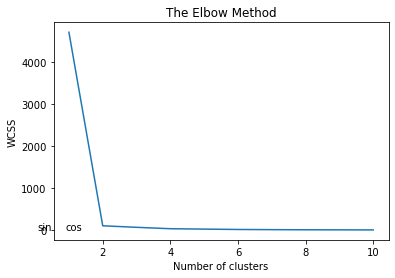

In [92]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 100)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#plt.text(0.08, 0.2, 'sin')
#plt.text(0.9, 0.2, 'cos')
plt.show()

In [89]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 100)
y_kmeans = kmeans.fit_predict(X)

In [90]:
y_kmeans

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

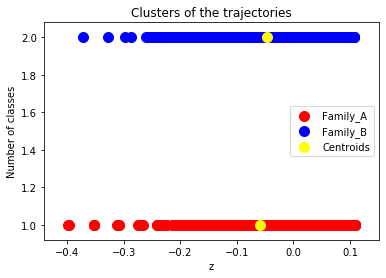

In [91]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Family_A')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Family_B')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of the trajectories')
plt.xlabel('z')
plt.ylabel('Number of classes')
plt.legend()
plt.savefig('clusters.png')
plt.show()